<a href="https://colab.research.google.com/github/popolome/RL-Practice-with-Gym-Taxi-v3-/blob/exp-taxi-qlearning-2025-12-14-02/RL_Practice_with_Gym(Taxi_v3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gymnasium

In [2]:
import gymnasium as gym
import numpy as np

# 1 - Create the environment

In [3]:
env = gym.make('Taxi-v3', render_mode='ansi')   # This ANSI is for text rendering
num_states = env.observation_space.n    # This is 500 states
num_actions = env.action_space.n    # This is 6 actions

# 2 - Initialize the Q-table

In [4]:
Q = np.zeros((num_states, num_actions), dtype = np.float32) # To define the Q matrix of zeros

# 3 - Define the hyperparameters

In [5]:
alpha = 0.1   # This is the learning rate
gamma = 0.9  # This is the
epsilon = 1.0   # This is the exploration probability
min_epsilon = 0.05
epsilon_decay = 0.999
num_episodes = 5000
max_steps = 100   # This is the optional truncation per episode
episode_rewards = []   # To track if learning is actually improving

# 4 - Training Loop

In [6]:
for episode in range(num_episodes):
  state, _ = env.reset()
  total_reward = 0
  done = False
  step = 0

  while not done and step < max_steps:    # Epsilon-greedy action selection
    if np.random.rand() < epsilon:
      action = env.action_space.sample()    # Exploration
    else:
      action = np.argmax(Q[state])    # Exploitation

    next_state, reward, terminated, truncated, info = env.step(action)   # Take a step/action
    done = terminated or truncated

    total_reward += reward    # Update the reward into total_reward

    # Q-learning update
    Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])

    state = next_state    # Update current state to next_state and repeat
    step += 1     # Increment step by 1 ensuring less than 100(max_steps)

  episode_rewards.append(total_reward)   # Add in the episode reward after each episode

  epsilon = max(min_epsilon, epsilon * epsilon_decay)     # Decay the epsilon every step

  if (episode + 1) % 500 == 0:
   print(f"Episode {episode + 1}/{num_episodes} complete")   # Print the progress

Episode 500/5000 complete
Episode 1000/5000 complete
Episode 1500/5000 complete
Episode 2000/5000 complete
Episode 2500/5000 complete
Episode 3000/5000 complete
Episode 3500/5000 complete
Episode 4000/5000 complete
Episode 4500/5000 complete
Episode 5000/5000 complete


# 5 - Plot the training reward per episode

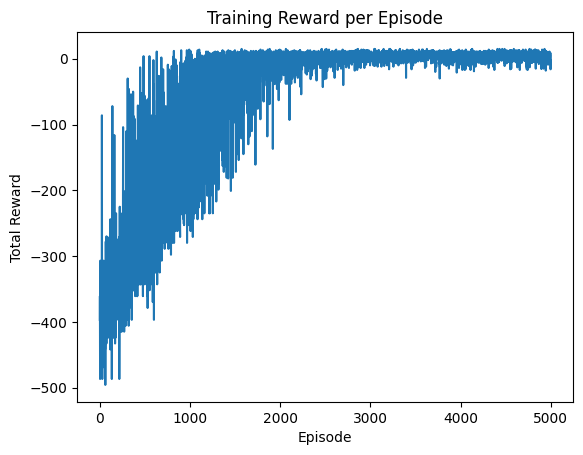

In [7]:
import matplotlib.pyplot as plt

plt.plot(episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Training Reward per Episode")
plt.show()

# 5 - Test the learned policy

In [8]:
state, _ = env.reset()
done = False
total_reward = 0

print("\n--- Testing the learned policy ---\n")

while not done:
  action = np.argmax(Q[state])      # Choose the best action at state
  next_state, reward, terminated, truncated, info = env.step(action)
  done = terminated or truncated
  state = next_state
  total_reward += reward      # Updates total_reward with the immediate reward
  print(env.render())     # Print the text map of Taxi-v3

print(f"\nTotal Reward with learned policy: {total_reward}")


--- Testing the learned policy ---

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (East)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: